In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
from keras.utils import to_categorical

In [ ]:
#Load data, the returnX_y argument is set to True to return data and labels
(x, y) = load_iris(return_X_y=True)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [ ]:
#To have same shape like input data
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

In [ ]:
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, BatchNormalization
from keras.models import Sequential
from keras.losses import CategoricalCrossentropy

In [ ]:
model = Sequential([
    Dense(16, activation='relu',input_dim=4),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-3),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=8, verbose=1)

Epoch 1/10
14/14 [==============================] - 2s 4ms/step - loss: 1.0538 - accuracy: 0.3214 
Epoch 2/10
14/14 [==============================] - 0s 3ms/step - loss: 0.9556 - accuracy: 0.6786
Epoch 3/10
14/14 [==============================] - 0s 2ms/step - loss: 0.8719 - accuracy: 0.8839
Epoch 4/10
14/14 [==============================] - 0s 2ms/step - loss: 0.7529 - accuracy: 0.8929
Epoch 5/10
14/14 [==============================] - 0s 2ms/step - loss: 0.6419 - accuracy: 0.8929
Epoch 6/10
14/14 [==============================] - 0s 2ms/step - loss: 0.5320 - accuracy: 0.9464
Epoch 7/10
14/14 [==============================] - 0s 2ms/step - loss: 0.4314 - accuracy: 0.9643
Epoch 8/10
14/14 [==============================] - 0s 2ms/step - loss: 0.3499 - accuracy: 0.9821
Epoch 9/10
14/14 [==============================] - 0s 2ms/step - loss: 0.2876 - accuracy: 0.9732
Epoch 10/10
14/14 [==============================] - 0s 2ms/step - loss: 0.2381 - accuracy: 0.9643


In [ ]:
model.evaluate(x_test, y_test, batch_size=8)

5/5 [==============================] - 0s 3ms/step - loss: 0.2256 - accuracy: 0.9737


[0.2256123572587967, 0.9736841917037964]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score

In [ ]:
y_pred = model.predict(x_train)
y_pred_rounded = [np.argmax(pred) for pred in y_pred]

accuracy = accuracy_score(np.argmax(y_train, axis=1), y_pred_rounded)
precision = precision_score(np.argmax(y_train, axis=1),
y_pred_rounded, average='macro')
recall = recall_score(np.argmax(y_train, axis=1), y_pred_rounded,
average='macro')
conf_matrix = confusion_matrix(np.argmax(y_train, axis=1),
y_pred_rounded)

4/4 [==============================] - 0s 3ms/step


In [ ]:
print(f'Accuracy: {round(accuracy,2)}\nPrecision:{round(precision,2)}\nRecall: {round(recall,2)}')
print(f'Confusion matrix:\n{conf_matrix}')

Accuracy: 0.98
Precision:0.98
Recall: 0.98
Confusion matrix:
[[38  0  0]
 [ 0 38  2]
 [ 0  0 34]]


In [ ]:
from matplotlib import pyplot as plt

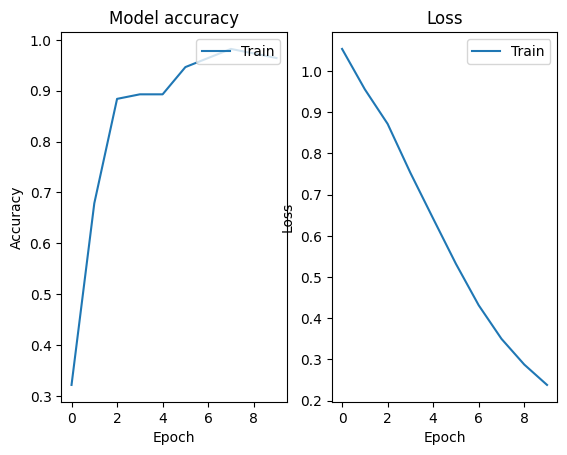

In [ ]:
_, ax = plt.subplots(1,2)

ax[0].plot(history.history['accuracy'])
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train'], loc='upper right')


ax[1].plot(history.history['loss'])
ax[1].set_title('Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train'], loc='upper right')

plt.show()

In [ ]:
y_result_train = model.predict(x_train)
y_result_train = np.round(y_result_train)
bledy = 0
for i in range(len(y_train)):
 if not np.array_equal(y_result_train[i], y_train[i]):
  bledy += 1
print("Liczba bledow ciagu treningowego: ", bledy)

4/4 [==============================] - 0s 4ms/step
Liczba bledow ciagu treningowego:  3


In [ ]:
y_train[i]

array([0., 0., 1.], dtype=float32)